# Project Name - PaisaBajar

# Project Type - Classification

#Contribution - Individual

# Project Summary
The project focused on classification and carried out individually, started with importing the dataset into a Pandas DataFrame. The first phase involved a detailed exploratory data analysis (EDA), where data types were reviewed, checks for missing or duplicate records were performed, and statistical summaries were generated for numerical fields. Visualizations were created to better understand key patterns in the data, and relevant recommendations were provided based on these insights. In the modeling stage, a RandomForestClassifier was used to train the model, and its performance was evaluated using accuracy on the test set.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset-2.csv') # Reading the dataset
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
pd.set_option('display.max_columns',None)

## Exploratory data analysis

In [ ]:
data.shape # checking shape of the data

(100000, 28)

In [ ]:
data.info() # checking general information like datatype, datapoint present in each column etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
data.isnull().sum() # Checking null values

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
data.duplicated().sum() # Checking duplicate data

np.int64(0)

In [ ]:
data.describe() # Checking statistical information

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
data.describe(include='object') # Checking statistical information for object type columns

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Stevex,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


### Visualization

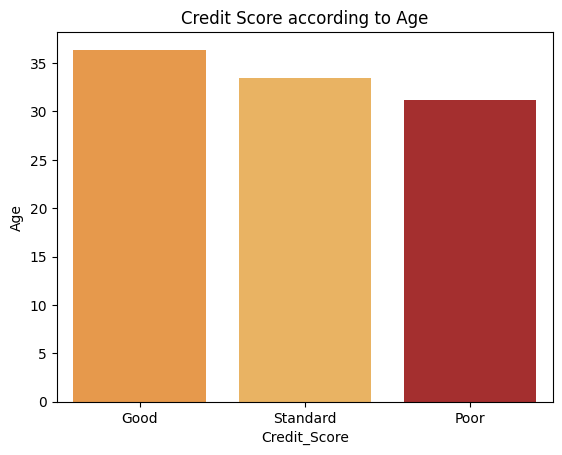

In [ ]:
# Checking credit score according to age group
bar_colours = {                                # using bar colours for better visualization
    'Good': '#ff9933',      # dark orange
    'Standard': '#ffb84d',  # medium orange
    'Poor': '#b71c1c'       # dark red
    }

sns.barplot(x = 'Credit_Score', y ='Age', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to Age')
plt.show()

## Insights
1. Age group of above 33 has a good credit score
2. Age group from 30 to 33 has a standard credit score
3. Age gropu of below 30 has a poor credit score

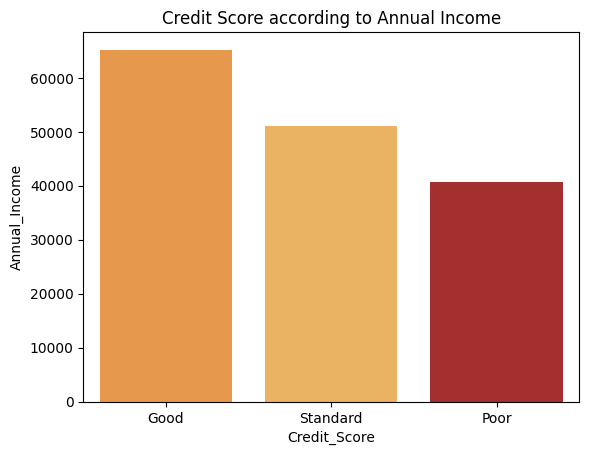

In [ ]:
# Checking credit score according to Annual income
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }

sns.barplot(x = 'Credit_Score', y ='Annual_Income', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to Annual Income')
plt.show()

## Insights
1.Person having annual income above 50k has a good credit score     
2.Person having annual income from 40k to 50k has a standard credit score  
3.Person having annual income below 40k has a poor credit score

In [ ]:
data.Num_of_Loan.unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

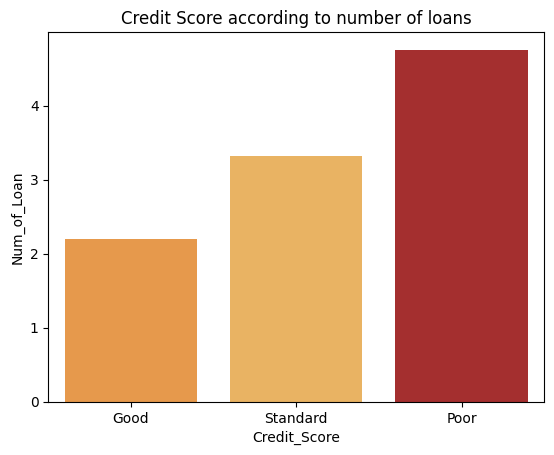

In [ ]:
# Checking credit score according to the number of loans taken
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Num_of_Loan', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to number of loans')
plt.show()

## Insights
1.Person having no. of loans below 3 has a good credit score  
2.Person having no. of loans from 2 to 3 has a standard credit score  
3.Person having no. of loans above 3 has a poor credit score

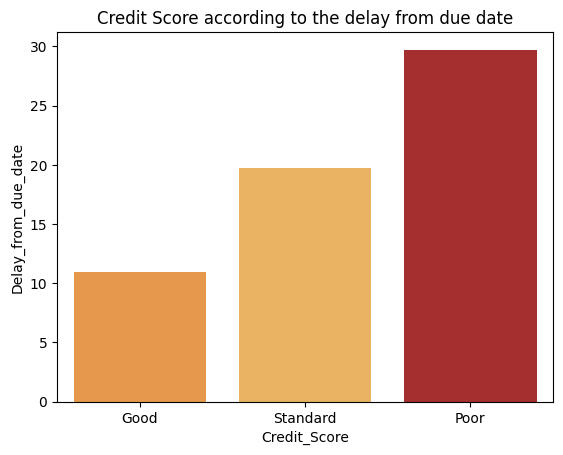

In [4]:
# Checking credit score according to the delay from due date
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Delay_from_due_date', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to the delay from due date')
plt.show()

## Insights
1.Person having delay by less than 11 days after the due-date has a good credit score  
2.Person having delay between 11 to 20 days after the due-date has a standard credit score  
3.Person having delay above 20 days after the due-date has a poor credit score

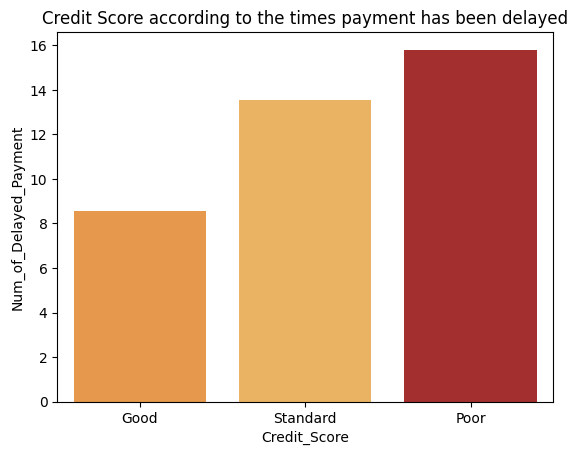

In [3]:
# Checking credit score according to how many times the payment has been delayed by a person
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Num_of_Delayed_Payment', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to the times payment has been delayed')
plt.show()

## Insights
1.Person who delayed the payment below 9 times has a good credit score  
2.Person who delayed the payment between 9 to 13 time has a standard credit score  
3.Person who delayed the payment above 13 times has a poor credit score

In [ ]:
data.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

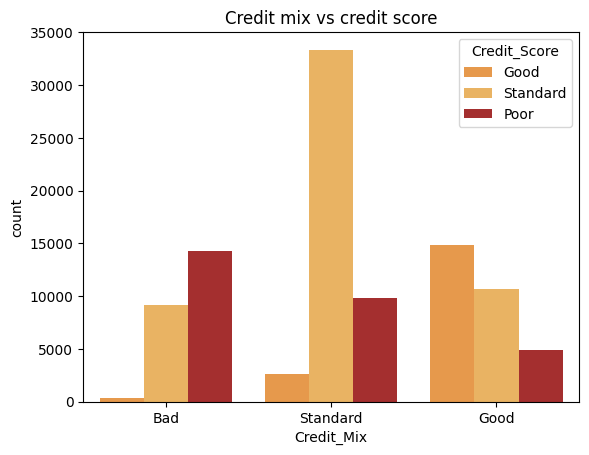

In [ ]:
# Checking credit score according to
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.countplot(x = 'Credit_Mix',hue='Credit_Score', data = data,palette = bar_colours)
plt.title('Credit mix vs credit score')
plt.show()

## Insights
1.Persons who have 'Good' as Credit_mix has higher no. of 'Good' credit score and lower no. of 'poor' credit score.  
2.Pesons who have 'Standard' as credit_mix has higher no. of 'Standard' credit score and lower no. of 'Good' credit score  
3.Persons who have 'Bad' as mix_score has higher no. of 'Poor' credit score and lower no. of 'Good' credit score

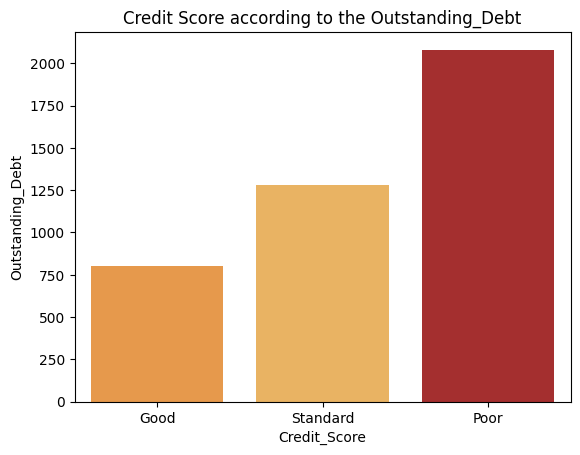

In [ ]:
# Checking credit score according to the Outstanding_Debt
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Outstanding_Debt', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to the Outstanding_Debt')
plt.show()

## Insights
1.Person who has outstanding_dept below 800 has a good credit score  
2.Person who has outstanding_dept between 800 to 1300 has a standard credit score.  
3.Person who has outstanding_dep above 1300 has a poor credit score

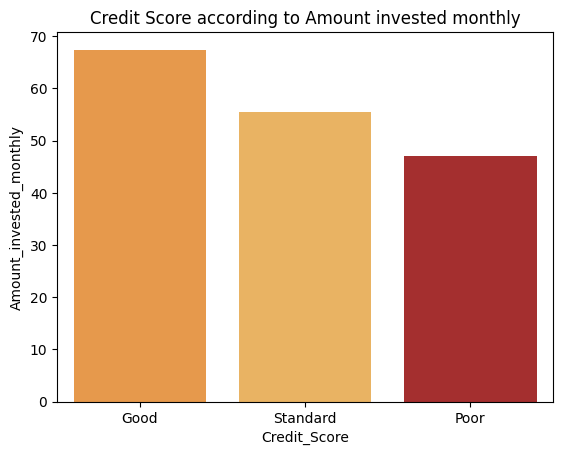

In [ ]:
# Checking credit score according to the Amount invested monthly
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Amount_invested_monthly', data = data,palette = bar_colours, ci = None)
plt.title('Credit Score according to Amount invested monthly')
plt.show()

## Insights
1.Person who has invested above 55 usd. monthly has a good credit score   
2.Person who has invested between 45 to 55 usd. monthly has a standard credit score   
3.Person who has invested below 45 monthly has a poor credit score

In [ ]:
data['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


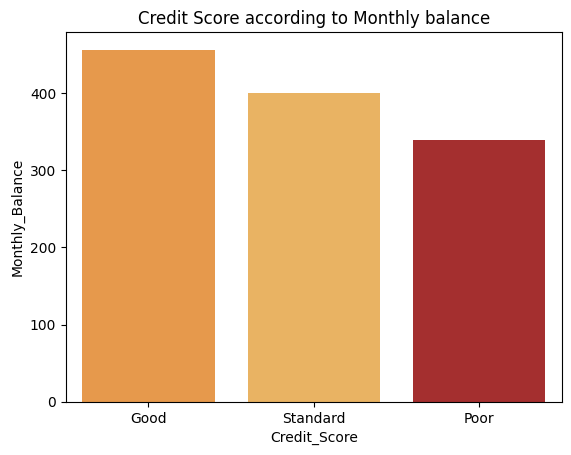

In [ ]:
# Checking credit score according to the Monthly balance
bar_colours = {
    'Good': '#ff9933',
    'Standard': '#ffb84d',
    'Poor': '#b71c1c'
    }
sns.barplot(x = 'Credit_Score', y ='Monthly_Balance', data = data,palette= bar_colours, ci = None)
plt.title('Credit Score according to Monthly balance')
plt.show()

## Insights
1.Person having monthly Balance above 390 has a good credit score  
2.Person having monthly balance between 320 to 390 has a standart credit score  
3.Person having monthly balance below 310 has a poor credit score

## Recommendations
The company should follow the customer’s criteria listed below when providing any products or services-:  
1. Minimum annual income should be greater than 40000.
2. The number of previously taken loans should be less than 4.
3. Delay of due payments should be less than 20.
4. The total no. of delayed payments should be less than 12.
5. Credit_mix score should be good
6. Outstanding Dept. should be less than 1300.
7. Monthly investment should be greater than 47.

* these are the recommendations which reflect a good Credit_Score.

In [ ]:
# Droping Unecessary Columns
data.drop(['ID','Customer_ID','Name','SSN','Occupation','Type_of_Loan'],axis = 1, inplace = True)

In [ ]:
data.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


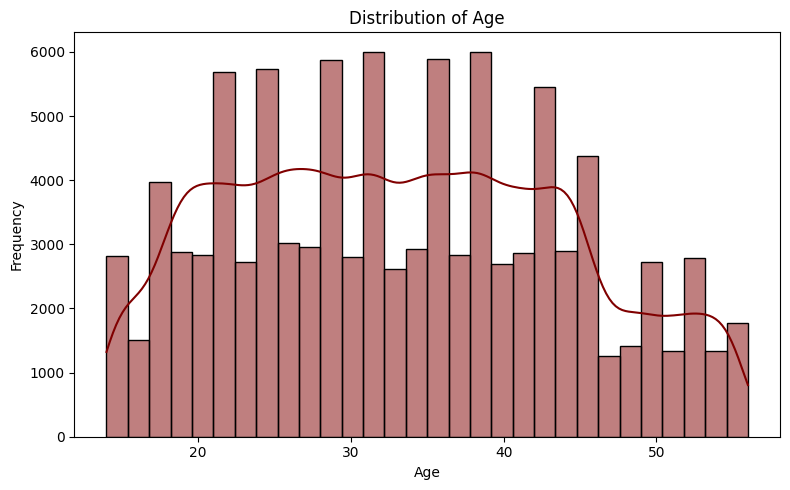

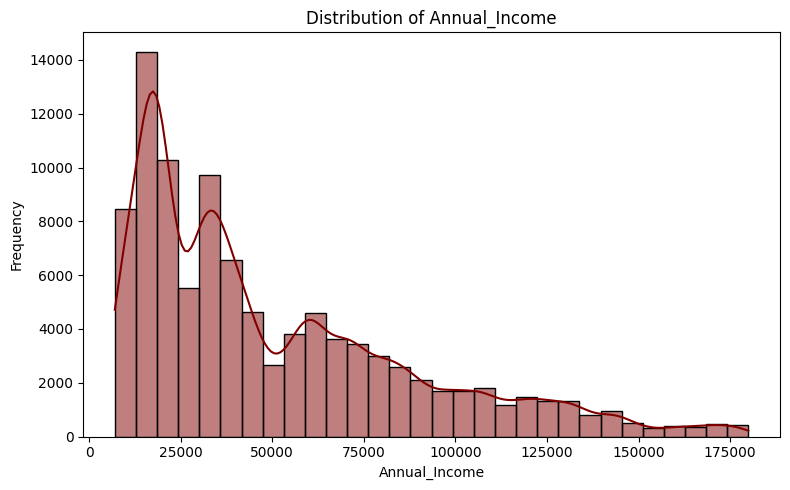

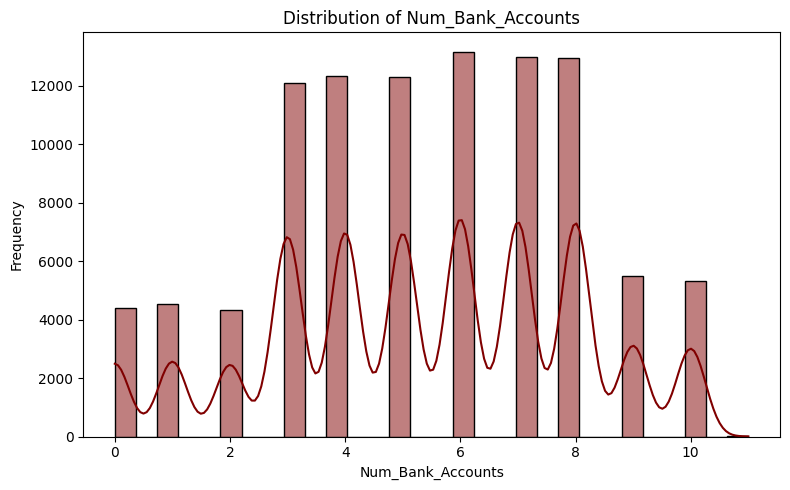

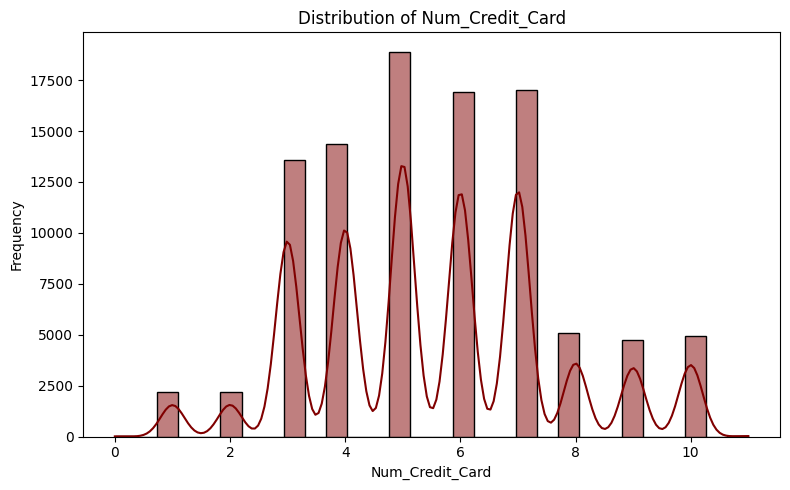

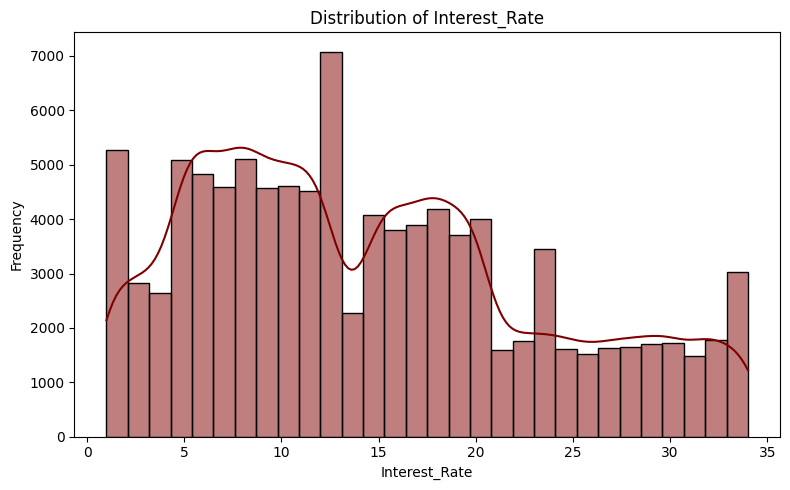

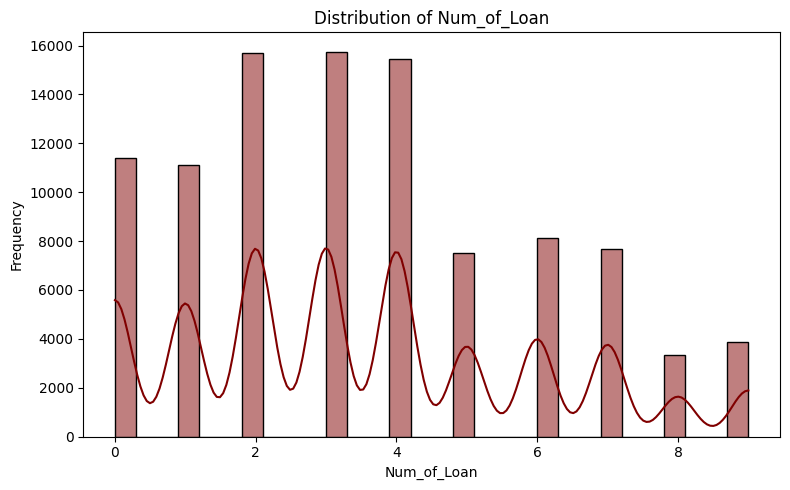

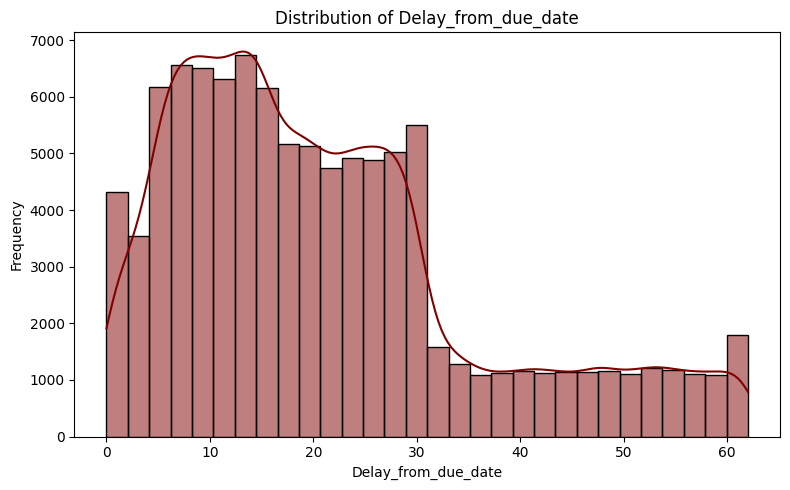

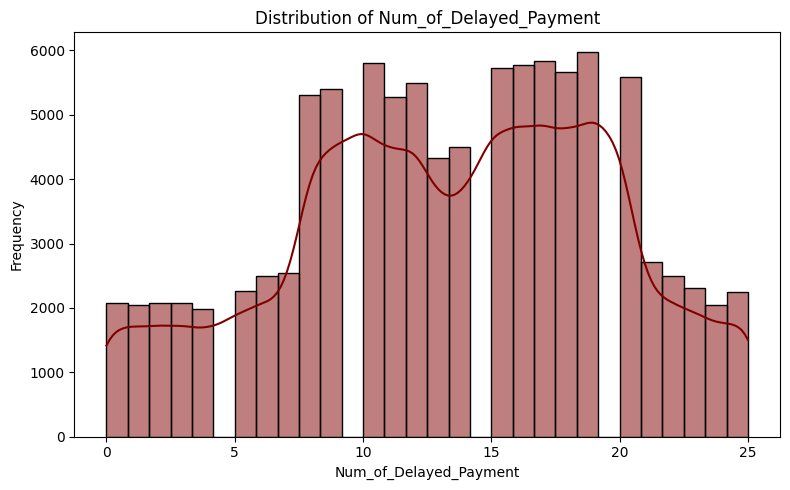

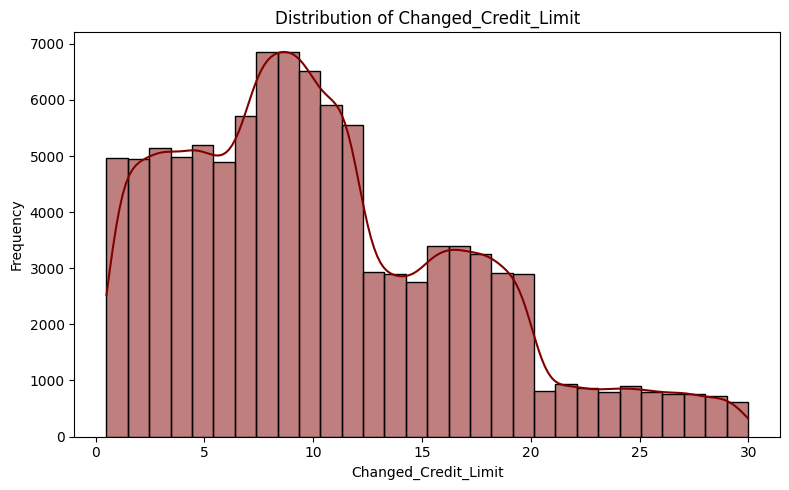

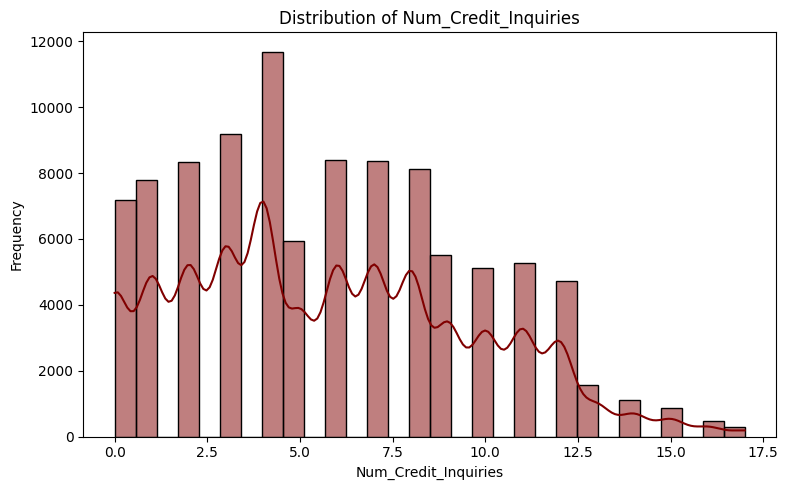

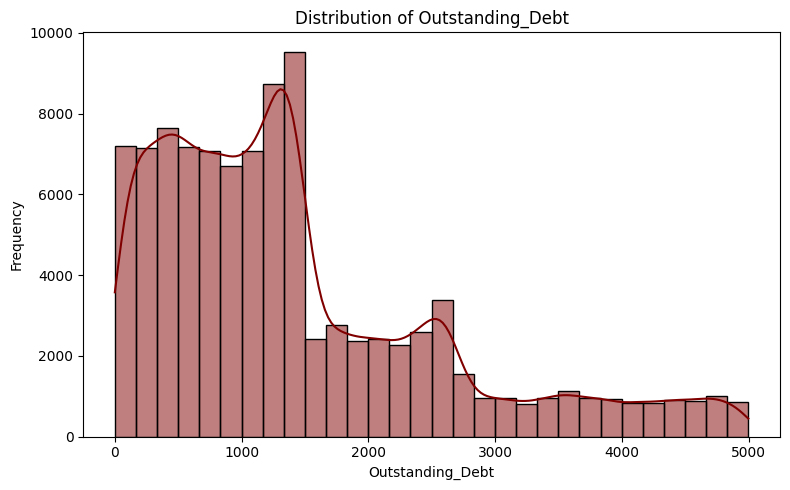

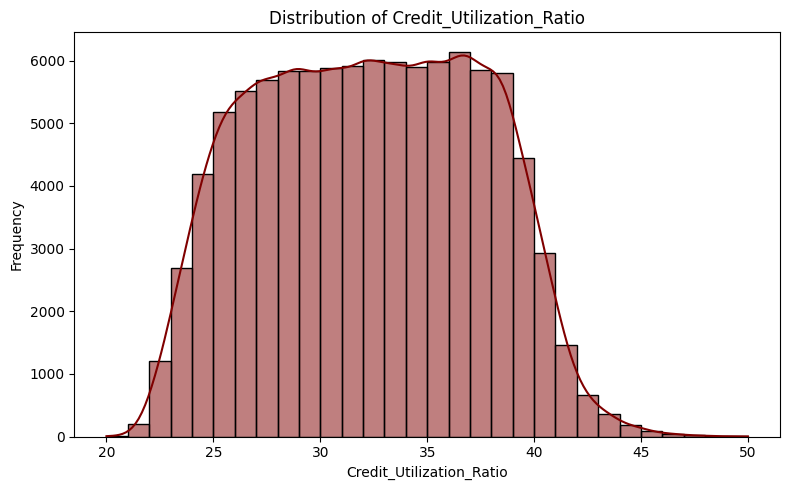

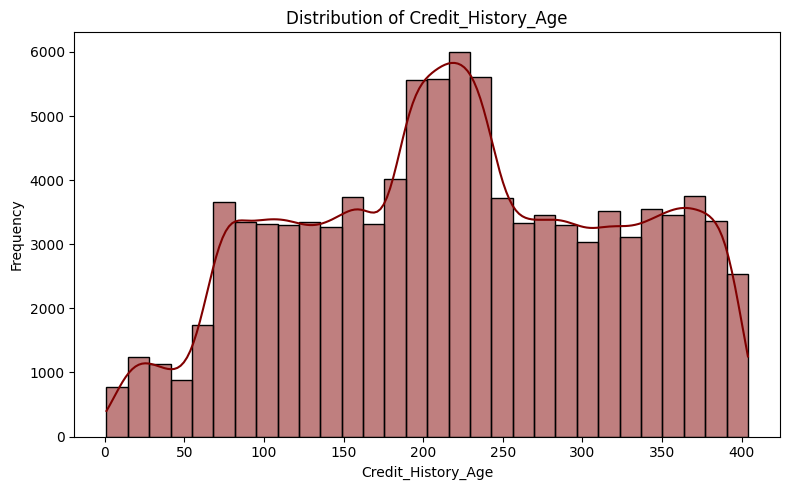

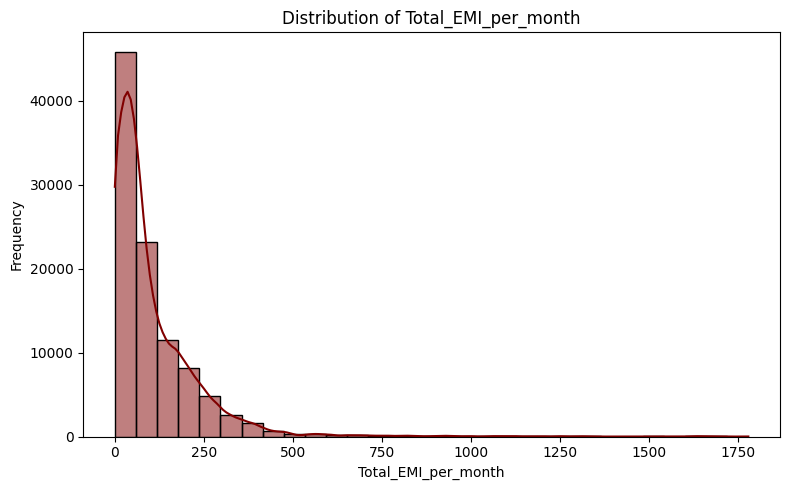

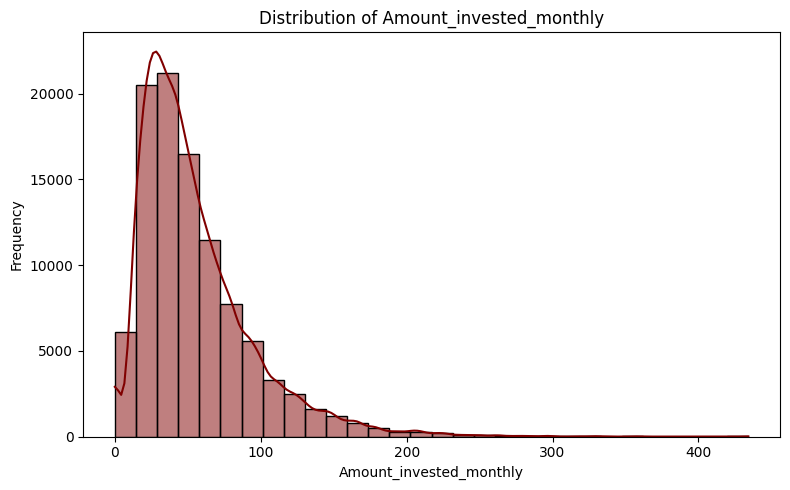

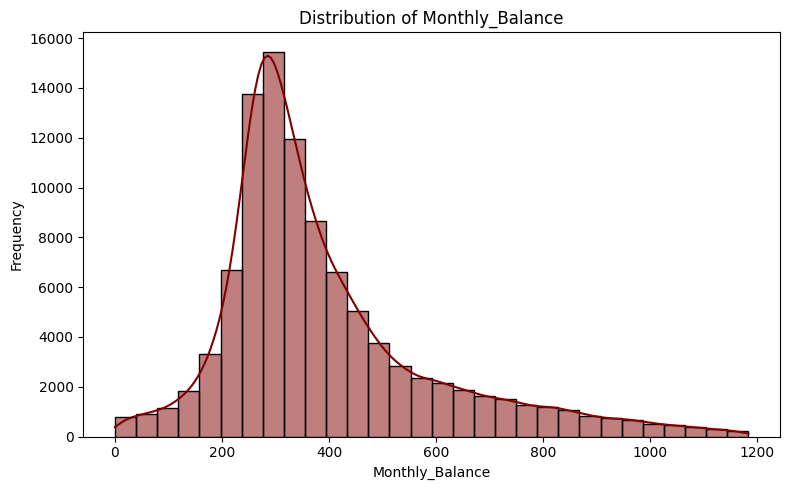

In [ ]:
# Checking the distribution of the columns
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
           'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
           'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
           'Amount_invested_monthly', 'Monthly_Balance']

for column in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, kde=True, color='#800000')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
data.head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good


### checking outliers using box plot

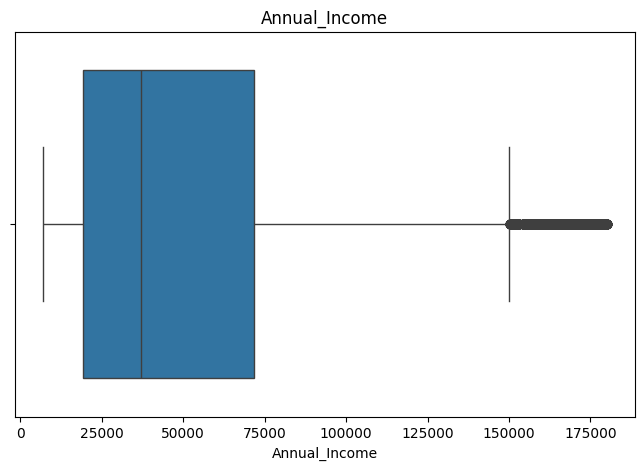

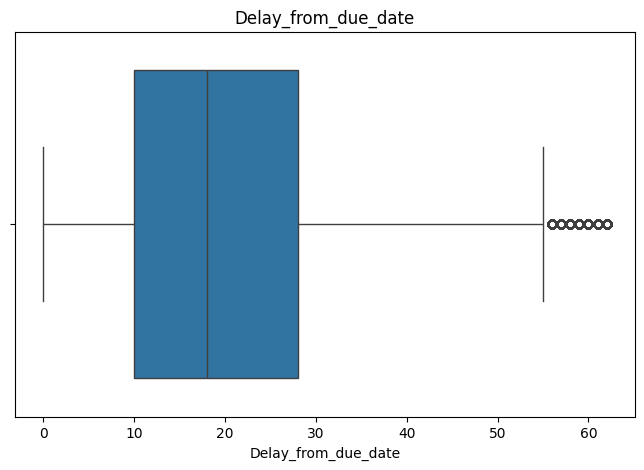

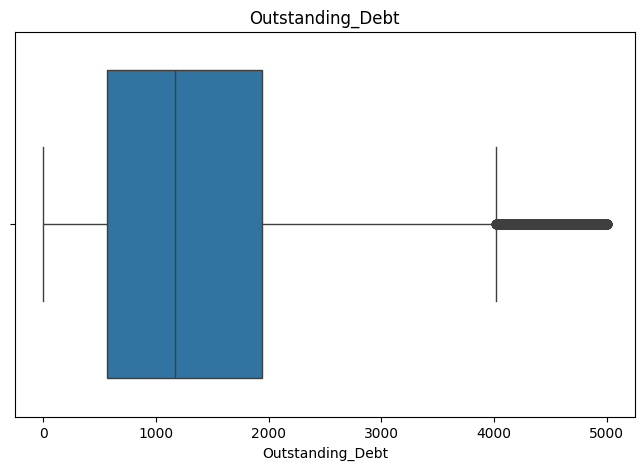

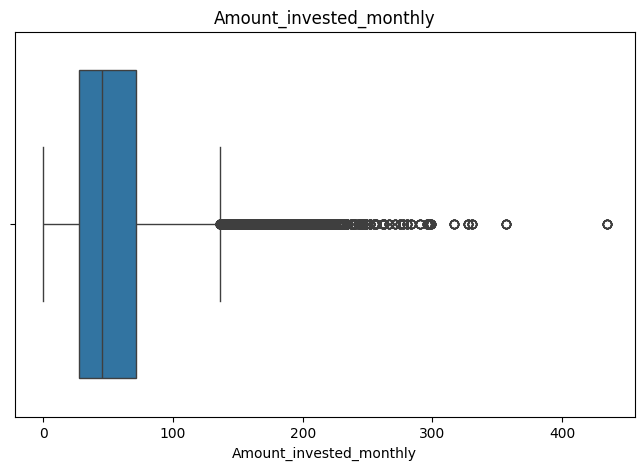

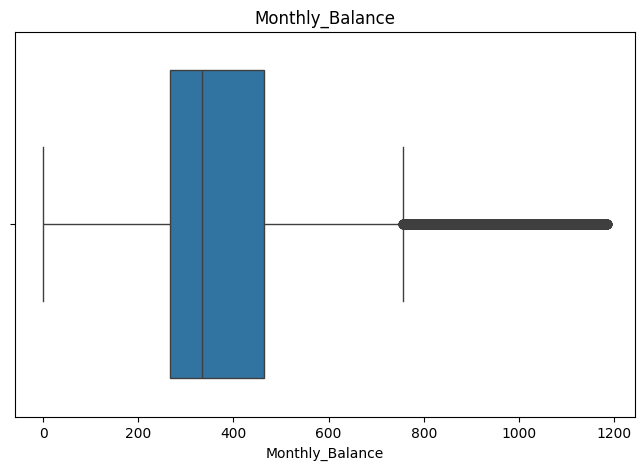

In [ ]:
columns = ['Annual_Income','Delay_from_due_date','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for column in columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(x = data[column])
  plt.title(column)
  plt.show()

## Insights
1.In some cases like Annual_income, Outstanding_dept, Monthly_Balance the points above the upper limit is overlaping or continues to each other they are not away from the upper limit so we don't consider it to be outliers.  
2.Data points which are far away from the upper limit is considered to be outliers and we will remove them.

### Handling outliers

In [ ]:
# Handling outliers using IQR method
q1 = data['Delay_from_due_date'].quantile(0.25)
q3 = data['Delay_from_due_date'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

data = data.loc[(data['Delay_from_due_date'] >= lower_limit) & (data['Delay_from_due_date'] <= upper_limit)]

In [ ]:
# Handling outlier manually
data = data.loc[(data['Amount_invested_monthly'] >= 0) & (data['Amount_invested_monthly'] <= 240)]

In [ ]:
# Handling outlier manually
data = data.loc[(data['Delay_from_due_date'] >= 0) & (data['Delay_from_due_date'] <= 55)]

### Encoding

In [ ]:
print(data['Credit_Mix'].unique())
print(data['Payment_of_Min_Amount'].unique())
print(data['Payment_Behaviour'].unique())

['Good' 'Standard' 'Bad']
['No' 'NM' 'Yes']
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [ ]:
# Converting categorical columns into numerical columns using manual encoding
data['Credit_Mix'] = data['Credit_Mix'].map({'Bad':0,'Standard':1,'Good':2})

In [ ]:
# Converting categorical columns into numerical columns using One-Hot encoding
df = pd.get_dummies(data['Payment_of_Min_Amount'], prefix = 'Payment_of_Min_Amount', drop_first = True)
data = pd.concat([data,df],axis = 1).drop(['Payment_of_Min_Amount'],axis = 1)

In [ ]:
# Converting categorical columns into numerical columns using One-Hot encoding
df = pd.get_dummies(data['Payment_Behaviour'], prefix = 'Payment_Behaviour', drop_first = True)
data = pd.concat([data,df],axis = 1,).drop(['Payment_Behaviour'],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95742 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Month                                               95742 non-null  int64  
 1   Age                                                 95742 non-null  float64
 2   Annual_Income                                       95742 non-null  float64
 3   Monthly_Inhand_Salary                               95742 non-null  float64
 4   Num_Bank_Accounts                                   95742 non-null  float64
 5   Num_Credit_Card                                     95742 non-null  float64
 6   Interest_Rate                                       95742 non-null  float64
 7   Num_of_Loan                                         95742 non-null  float64
 8   Delay_from_due_date                                 95742 non-null  float64
 9   

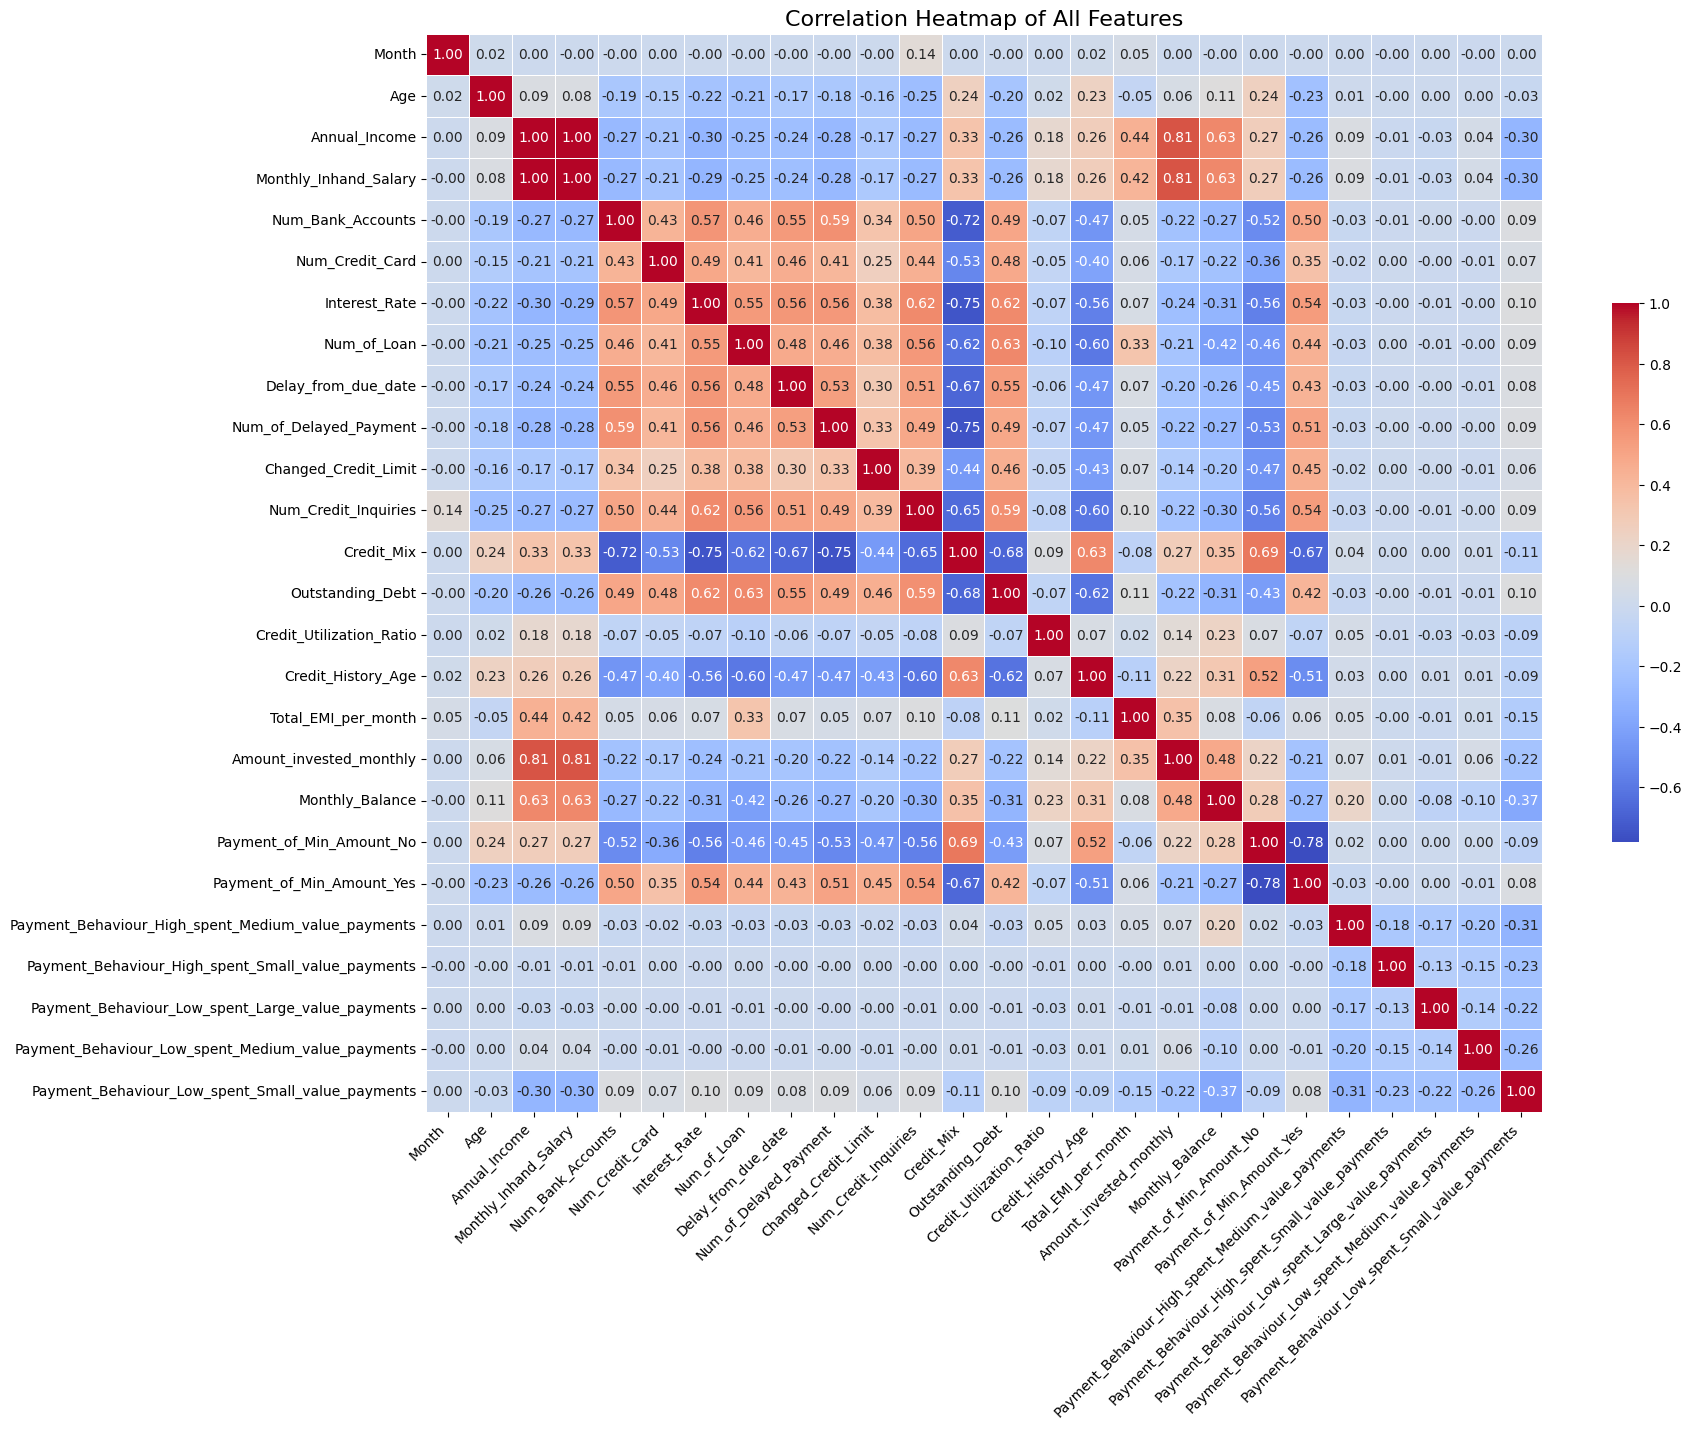

In [ ]:
# Checking correlation among the variables
plt.figure(figsize = (18,14))
sns.heatmap(data.corr(numeric_only=True),annot = True,fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5, cbar_kws = {'shrink':0.5}) #cbar_kws is hight of colour bar

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

Annual_income and Monthly_Inhand_Salary are highly correlated columns,  
so i am going to remove Monthly_Inhand_Salary column

In [ ]:
# Droping Monthly_Inhand_Salary column
data.drop(['Monthly_Inhand_Salary'],axis = 1, inplace = True)

In [ ]:
data.head(1)

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.82262,265.0,49.574949,21.46538,312.494089,Good,True,False,False,True,False,False,False


In [ ]:
data.columns

Index(['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [ ]:
# Defining x(features) and y(target)
x = data.loc[:, ['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
                 'Monthly_Balance', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
                 'Payment_Behaviour_High_spent_Medium_value_payments',
                 'Payment_Behaviour_High_spent_Small_value_payments',
                 'Payment_Behaviour_Low_spent_Large_value_payments',
                 'Payment_Behaviour_Low_spent_Medium_value_payments',
                 'Payment_Behaviour_Low_spent_Small_value_payments']]

y = data['Credit_Score']


In [ ]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42,stratify=y )

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76593, 25)
(19149, 25)
(76593,)
(19149,)


In [ ]:
# Scalling the training data using MinMaxScaller
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Creating the model, using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing random forest

model = RandomForestClassifier(n_estimators=300) #object creation ,taking 350 decision trees
model.fit(x_train,y_train) # training the data

RandomForestClassifier(n_estimators=300)

In [ ]:
# predicting x_test to check accuracy
y_pred = model.predict(x_test)
y_pred

array(['Good', 'Standard', 'Poor', ..., 'Standard', 'Standard', 'Poor'],
      dtype=object)

In [ ]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
# Checking the testing accuracy of the model
accuracy_score(y_test, y_pred)


0.8304350096610789

In [ ]:
# Using RandomizedSearchCV to find the best hyperparameters for a Random Forest model
from sklearn.model_selection import RandomizedSearchCV  # Importing RandomizedSearchCV

# Define ranges for hyperparameters to try
n_estimators = [50, 100]  # Number of trees in the forest
max_features = ['sqrt']   # Number of features to consider at each split
max_depth = [10, 30, None]  # Maximum depth of the tree
min_samples_split = [2, 5]  # Minimum samples required to split a node
min_samples_leaf = [1, 2]   # Minimum samples required at each leaf node
bootstrap = [True]          # Whether bootstrap samples are used when building trees

# Combine into a hyperparameter grid
random_grid = {
    'n_estimators': n_estimators,            # Number of trees
    'max_features': max_features,            # Features to consider at each split
    'max_depth': max_depth,                  # Maximum tree depth
    'min_samples_split': min_samples_split,  # Minimum split size
    'min_samples_leaf': min_samples_leaf,    # Minimum leaf size
    'bootstrap': bootstrap                   # Use bootstrap samples
}


In [ ]:
# Taking sample to speed up the search
x_sample = x_train[:10000]
y_sample = y_train[:10000]


In [ ]:
# Creating base Random Forest model
model = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV to find best hyperparameters
model = RandomizedSearchCV(
    estimator=model,
    scoring='accuracy',        # metric to optimize
    param_distributions=random_grid,  # parameter options
    n_iter=2,                # number of combinations to try
    cv=2,                      # 2-fold cross-validation
    verbose=2,                 # show progress
    random_state=42,
    n_jobs=-1
    )

# Train using randomized search
model.fit(x_sample, y_sample)

# Get and print best parameters
rf_best_params = model.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False})


In [ ]:
# fitting the best parameters
rf_clf2 = RandomForestClassifier(n_estimators= 600, min_samples_split= 10,
                                 min_samples_leaf= 4, max_features= 'sqrt',
                                 max_depth= 90, bootstrap= False)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training


RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=600)

In [ ]:
y_predict=rf_clf2.predict(x_test)#testing
x=accuracy_score(y_test,y_predict)#checking performance
x

0.8283983497832785